In [1]:
import pandas as pd
import numpy as np
df = pd.read_pickle('DATA/Dataset/wikiart/wikiartINFL.pkl')
embeddings = np.vstack(df['image_features'].values)



In [14]:
#group by timeframe and compute the distance between the mean of the embeddings within the timeframe

df_group = df.groupby('timeframe_estimation')
distance_list = []
for group in df_group.groups:
    print(group)
    group_df = df_group.get_group(group)
    group_embeddings = np.vstack(group_df['image_features'].values)
    mean_embedding = np.mean(group_embeddings, axis=0)
    distances = np.linalg.norm(group_embeddings - mean_embedding, axis=1)
    print(np.mean(distances))
    # group_df['distance'] = distances
    # print(group_df[['distance']].sort_values('distance', ascending=False).head(5))

1400-1450
10.968136
1450-1500
14.615137
1500-1550
14.825448
1550-1600
13.910765
1600-1650
14.332055
1650-1700
14.278875
1700-1750
14.444134
1750-1800
13.570471
1800-1850
14.454664
1850-1900
14.938046
1900-1950
15.167781
1950-2000
15.643068
2000-2050
14.919926


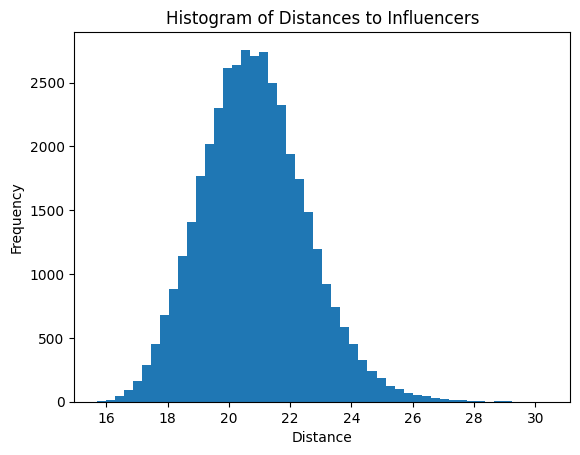

In [18]:
from sklearn.metrics.pairwise import euclidean_distances
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_pickle('DATA/Dataset/wikiart/wikiartINFL.pkl')
embeddings = np.vstack(df['image_features'].values)
# Calculate distances between observations and their influencers
influencer_distances = []

for i, obs in df.iterrows():
    obs_vector = embeddings[i]
    influencers = obs['influenced_by']
    influencer_vectors = embeddings[df['artist_name'].isin(influencers)]
    
    if len(influencer_vectors) > 0:
        distances_to_influencers = euclidean_distances([obs_vector], influencer_vectors)
        avg_distance_to_influencers = np.mean(distances_to_influencers)
        influencer_distances.append(avg_distance_to_influencers)
    else:
        influencer_distances.append(np.nan)

df['influencer_distance'] = influencer_distances

#Analyze and plot influencer distances
plt.hist(df['influencer_distance'].dropna(), bins=50)
plt.title('Histogram of Distances to Influencers')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()


In [21]:
df.groupby('artist_name')['influencer_distance'].mean()

artist_name
adriaen-brouwer           19.842512
adriaen-van-ostade        20.637928
albrecht-durer            21.286177
alfred-sisley             19.320747
alphonse-mucha            20.771080
                            ...    
william-james-glackens    22.560398
william-merritt-chase     20.029058
william-turner            21.831253
winslow-homer             20.226562
zinaida-serebriakova      19.969364
Name: influencer_distance, Length: 154, dtype: float32

In [17]:
df['influencer_distance']

0      22.972967
1      18.601810
2            NaN
3            NaN
4            NaN
         ...    
995    22.957687
996    20.088682
997    21.616325
998    22.388079
999    22.031797
Name: influencer_distance, Length: 1000, dtype: float64